# Analysis using HistGradientBoostingRegressor

In [89]:
import pandas

In [90]:
dataset = pandas.read_csv("../data/stopoutput123.csv")
dataset.head()

dataset = dataset.head(5_000_000)

/var/folders/0d/y9xg9gkj7y1ffmn0_g8_k68w0000gn/T/ipykernel_11569/380230431.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pandas.read_csv("../data/stopoutput123.csv")


In [91]:
actual_time = pandas.to_datetime(dataset['timestamp'].str.split(' ').str[0] + ' ' + dataset['actualTime'], errors='coerce')
planned_time = pandas.to_datetime(dataset['timestamp'].str.split(' ').str[0] + ' ' + dataset['plannedTime'], errors='coerce')

dataset['delay'] = (actual_time - planned_time).dt.total_seconds() / 60

dataset = dataset[dataset['delay'].abs() < 60]

dataset.head()

,timestamp,busStopID,stopName,patternText,direction,actualTime,plannedTime,status,routeId,tripId,vehicleId,delay
0,2024-12-21 00:00:02,1050,Rungholtplatz,N22,Schwentinental,00:22,00:22,PREDICTED,1610073983892324360,1.610078e+18,-7.638105e+18,0.0
1,2024-12-21 00:00:02,1062,"Wik, Kanal",N11,Dietrichsdorf,00:00,00:00,STOPPING,1610073983892324359,1.610078e+18,-7.638105e+18,0.0
2,2024-12-21 00:00:02,1005,Belvedere,N12,Strande,00:04,00:02,PREDICTED,1610073983892324353,1.610078e+18,-7.638105e+18,2.0
3,2024-12-21 00:00:02,1005,Belvedere,N11,Dietrichsdorf,00:05,00:05,PREDICTED,1610073983892324359,1.610078e+18,-7.638105e+18,0.0
4,2024-12-21 00:00:02,1064,"Schilksee, Kirche",N12,Eiderbrücke,00:10,00:10,PREDICTED,1610073983892324353,1.610078e+18,-7.638105e+18,0.0


In [ ]:
initial_rows = len(dataset)
print(f"Rows before NaN-value-removal: {initial_rows}")
dataset = dataset.dropna()

final_rows = len(dataset)
deleted_rows = initial_rows - final_rows
print(f"Rows after NaN-value-removal: {final_rows}")
print(f"-Count of deleted rows: {deleted_rows}")

dataset.head()

Rows before NaN-value-removal: 4853057
Rows after NaN-value-removal: 4853057
-Count of deleted rows: 0


,timestamp,busStopID,stopName,patternText,direction,actualTime,plannedTime,status,routeId,tripId,vehicleId,delay
0,2024-12-21 00:00:02,1050,Rungholtplatz,N22,Schwentinental,00:22,00:22,PREDICTED,1610073983892324360,1.610078e+18,-7.638105e+18,0.0
1,2024-12-21 00:00:02,1062,"Wik, Kanal",N11,Dietrichsdorf,00:00,00:00,STOPPING,1610073983892324359,1.610078e+18,-7.638105e+18,0.0
2,2024-12-21 00:00:02,1005,Belvedere,N12,Strande,00:04,00:02,PREDICTED,1610073983892324353,1.610078e+18,-7.638105e+18,2.0
3,2024-12-21 00:00:02,1005,Belvedere,N11,Dietrichsdorf,00:05,00:05,PREDICTED,1610073983892324359,1.610078e+18,-7.638105e+18,0.0
4,2024-12-21 00:00:02,1064,"Schilksee, Kirche",N12,Eiderbrücke,00:10,00:10,PREDICTED,1610073983892324353,1.610078e+18,-7.638105e+18,0.0


In [93]:
initial_rows = len(dataset)
print(f"Pre-Removing-Duplicats: {initial_rows}")

dataset = dataset.sort_values('actualTime')

dataset = dataset.drop_duplicates(subset=['busStopID', 'tripId'], keep='last')

final_rows = len(dataset)
deleted_rows = initial_rows - final_rows
print(f"Post-Removing-Duplicats: {final_rows}")
print(f"-Count of deleted rows: {deleted_rows}")

dataset.head()

Pre-Removing-Duplicats: 4853057
Post-Removing-Duplicats: 348104
-Count of deleted rows: 4504953


,timestamp,busStopID,stopName,patternText,direction,actualTime,plannedTime,status,routeId,tripId,vehicleId,delay
187,2024-12-21 00:00:29,2252,Solldiekswall,N42,Suchsdorf,00:01,00:00,PREDICTED,1610073983892324366,1.610078e+18,-7.638105e+18,1.0
152,2024-12-21 00:00:25,2024,Im Saal,N42,Suchsdorf,00:03,00:02,PREDICTED,1610073983892324366,1.610078e+18,-7.638105e+18,1.0
134,2024-12-21 00:00:22,1928,Barkauer Straße,N42,Suchsdorf,00:04,00:03,PREDICTED,1610073983892324366,1.610078e+18,-7.638105e+18,1.0
209,2024-12-21 00:00:30,2380,Fettberg,N42,Suchsdorf,00:07,00:06,PREDICTED,1610073983892324366,1.610078e+18,-7.638105e+18,1.0
102,2024-12-21 00:00:18,1748,Kronsburg,N42,Suchsdorf,00:08,00:07,PREDICTED,1610073983892324366,1.610078e+18,-7.638105e+18,1.0


In [94]:
import numpy as np

dataset['weekday'] = actual_time.dt.day_name()
dataset['month'] = actual_time.dt.month

seconds_in_day = 24 * 60 * 60
time_in_seconds = actual_time.dt.hour * 3600 + actual_time.dt.minute * 60 + actual_time.dt.second
dataset['time_sin'] = np.sin(2 * np.pi * time_in_seconds / seconds_in_day)
dataset['time_cos'] = np.cos(2 * np.pi * time_in_seconds / seconds_in_day)

dataset.head()

,timestamp,busStopID,stopName,patternText,direction,actualTime,plannedTime,status,routeId,tripId,vehicleId,delay,weekday,month,time_sin,time_cos
187,2024-12-21 00:00:29,2252,Solldiekswall,N42,Suchsdorf,00:01,00:00,PREDICTED,1610073983892324366,1.610078e+18,-7.638105e+18,1.0,Saturday,12.0,0.004363,0.999990
152,2024-12-21 00:00:25,2024,Im Saal,N42,Suchsdorf,00:03,00:02,PREDICTED,1610073983892324366,1.610078e+18,-7.638105e+18,1.0,Saturday,12.0,0.013090,0.999914
134,2024-12-21 00:00:22,1928,Barkauer Straße,N42,Suchsdorf,00:04,00:03,PREDICTED,1610073983892324366,1.610078e+18,-7.638105e+18,1.0,Saturday,12.0,0.017452,0.999848
209,2024-12-21 00:00:30,2380,Fettberg,N42,Suchsdorf,00:07,00:06,PREDICTED,1610073983892324366,1.610078e+18,-7.638105e+18,1.0,Saturday,12.0,0.030539,0.999534
102,2024-12-21 00:00:18,1748,Kronsburg,N42,Suchsdorf,00:08,00:07,PREDICTED,1610073983892324366,1.610078e+18,-7.638105e+18,1.0,Saturday,12.0,0.034899,0.999391


In [95]:
dataset = dataset.drop(columns=["busStopID", "timestamp", "routeId", "actualTime", "plannedTime", "tripId", "vehicleId", "status"])

dataset.head()

,stopName,patternText,direction,delay,weekday,month,time_sin,time_cos
187,Solldiekswall,N42,Suchsdorf,1.0,Saturday,12.0,0.004363,0.999990
152,Im Saal,N42,Suchsdorf,1.0,Saturday,12.0,0.013090,0.999914
134,Barkauer Straße,N42,Suchsdorf,1.0,Saturday,12.0,0.017452,0.999848
209,Fettberg,N42,Suchsdorf,1.0,Saturday,12.0,0.030539,0.999534
102,Kronsburg,N42,Suchsdorf,1.0,Saturday,12.0,0.034899,0.999391


In [96]:
dataset_ready = pandas.get_dummies(dataset, dummy_na=True)
dataset_ready = dataset_ready.dropna(subset=['delay'])

print(f"Dataset shape after preprocessing: {dataset_ready.shape}")
dataset_ready.head()

Dataset shape after preprocessing: (348104, 514)


,delay,month,time_sin,time_cos,stopName_Aalborgring,stopName_Abzweig Klausdorf,stopName_Adalbertstraße,stopName_Adelheidstraße,stopName_Adolf-Westphal-Straße,"stopName_Ahz.-Stift, Ostpreußenplatz",...,direction_XXX,direction_nan,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weekday_nan
187,1.0,12.0,0.004363,0.999990,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
152,1.0,12.0,0.013090,0.999914,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
134,1.0,12.0,0.017452,0.999848,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
209,1.0,12.0,0.030539,0.999534,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
102,1.0,12.0,0.034899,0.999391,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [98]:
y = dataset_ready["delay"]
X = dataset_ready.drop(columns=["delay"])

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {X.shape[1]}")

Features shape: (348104, 513)
Target shape: (348104,)
Number of features: 513


In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 278483 samples
Test set size: 69621 samples


In [100]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(
    loss="squared_error",
    learning_rate=0.05, # hopefully this leads to less overfitting??
    max_iter=600,
    max_depth=None,
    l2_regularization=0.1,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=30,
    random_state=42,
    verbose=1,
)

weights = 1 + (y_train > 5).astype(int) * 4 # delays longer than 5 minutes are weighted more heavily

model.fit(X_train, y_train, sample_weight=weights)

Binning 1.029 GB of training data: 3.788 s
Binning 0.114 GB of validation data: 0.068 s
Fitting gradient boosted rounds:
[1/600] 1 tree, 31 leaves, max depth = 13, train loss: 8.85454, val loss: 7.96593, in 0.168s
[2/600] 1 tree, 31 leaves, max depth = 13, train loss: 8.69409, val loss: 7.78889, in 0.168s
[3/600] 1 tree, 31 leaves, max depth = 13, train loss: 8.53490, val loss: 7.63289, in 0.168s
[4/600] 1 tree, 31 leaves, max depth = 12, train loss: 8.37829, val loss: 7.48960, in 0.168s
[5/600] 1 tree, 31 leaves, max depth = 12, train loss: 8.22691, val loss: 7.35959, in 0.164s
[6/600] 1 tree, 31 leaves, max depth = 12, train loss: 8.09980, val loss: 7.23685, in 0.165s
[7/600] 1 tree, 31 leaves, max depth = 12, train loss: 7.98925, val loss: 7.12954, in 0.175s
[8/600] 1 tree, 31 leaves, max depth = 11, train loss: 7.88168, val loss: 7.02853, in 0.159s
[9/600] 1 tree, 31 leaves, max depth = 13, train loss: 7.76924, val loss: 6.94058, in 0.157s
[10/600] 1 tree, 31 leaves, max depth = 13

HistGradientBoostingRegressor(early_stopping=True, l2_regularization=0.1,
                              learning_rate=0.05, max_iter=600,
                              n_iter_no_change=30, random_state=42, verbose=1)

In [101]:
y_pred_rf = model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE (Mean Absolute Error): {mae_rf:.2f} minutes")
print(f"RMSE(Root Mean Square Error): {rmse_rf:.2f} minutes")
print(f"R^2 (R-squared Score): {r2_rf:.4f}")

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"\nTraining R^2 Score: {train_score:.4f}")
print(f"Test R^2 Score: {test_score:.4f}")

if train_score - test_score > 0.1:
    print("WARNING: Overfitting??")

MAE (Mean Absolute Error): 1.08 minutes
RMSE(Root Mean Square Error): 1.81 minutes
R^2 (R-squared Score): 0.3904

Training R^2 Score: 0.4073
Test R^2 Score: 0.3904


In [102]:
def predict_delay_rf(stop_name, pattern_text, direction, weekday, month, hour, minute):
    valid_stops = set(dataset['stopName'].unique())
    valid_patterns = set(dataset['patternText'].unique())
    valid_directions = set(dataset['direction'].unique())
    valid_weekdays = set(dataset['weekday'].unique())
    
    if stop_name not in valid_stops:
        stop_name = dataset['stopName'].value_counts().index[0]
        print(f"Warning: Using fallback stop '{stop_name}'")
    
    if pattern_text not in valid_patterns:
        pattern_text = dataset['patternText'].value_counts().index[0]
        print(f"Warning: Using fallback pattern '{pattern_text}'")
    
    if direction not in valid_directions:
        direction = dataset['direction'].value_counts().index[0]
        print(f"Warning: Using fallback direction '{direction}'")
    
    if weekday not in valid_weekdays:
        weekday = dataset['weekday'].value_counts().index[0]
        print(f"Warning: Using fallback weekday '{weekday}'")
    
    sample = {
        'stopName': stop_name,
        'patternText': pattern_text,
        'direction': direction,
        'weekday': weekday,
        'month': float(month),
    }

    seconds_in_day = 24 * 60 * 60
    time_in_seconds = hour * 3600 + minute * 60
    sample['time_sin'] = np.sin(2 * np.pi * time_in_seconds / seconds_in_day)
    sample['time_cos'] = np.cos(2 * np.pi * time_in_seconds / seconds_in_day)

    sample_df = pandas.DataFrame([sample])
    sample_dummies = pandas.get_dummies(sample_df, dummy_na=True)
    
    sample_ready = pandas.DataFrame(0, index=[0], columns=X.columns)
    for col in sample_dummies.columns:
        if col in sample_ready.columns:
            sample_ready.loc[0, col] = sample_dummies[col].iloc[0]

    predicted_delay = model.predict(sample_ready)
    return predicted_delay[0]


rf_pred1 = predict_delay_rf(
    stop_name='Rungholtplatz',
    pattern_text='N22',
    direction='Schwentinental',
    weekday='Saturday',
    month=12,
    hour=0,
    minute=22
)
print(f"Test 1 (known values): {rf_pred1:.2f} minutes")

rf_pred2 = predict_delay_rf(
    stop_name='Hauptbahnhof',
    pattern_text='11',
    direction='Dietrichsdorf',
    weekday='Saturday',
    month=6,
    hour=15,
    minute=30
)
print(f"Test 2 (different values): {rf_pred2:.2f} minutes")

rf_pred3 = predict_delay_rf(
    stop_name='UnknownStop',
    pattern_text='UnknownPattern',
    direction='UnknownDirection',
    weekday='Monday',
    month=3,
    hour=8,
    minute=15
)
print(f"Test 3 (unknown values): {rf_pred3:.2f} minutes")

Test 1 (known values): 0.32 minutes
Test 2 (different values): 0.70 minutes
Test 3 (unknown values): 3.55 minutes


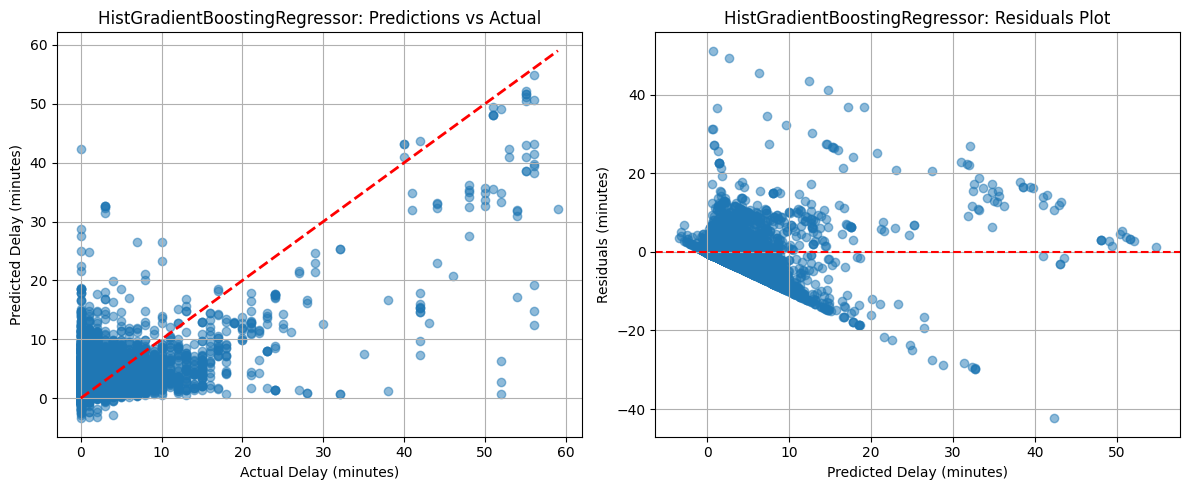

In [103]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Delay (minutes)")
plt.ylabel("Predicted Delay (minutes)")
plt.title("HistGradientBoostingRegressor: Predictions vs Actual")
plt.grid(True)

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Delay (minutes)")
plt.ylabel("Residuals (minutes)")
plt.title("HistGradientBoostingRegressor: Residuals Plot")
plt.grid(True)

plt.tight_layout()
plt.show()